In [36]:
import pandas as pd
import numpy as np
from datetime import timedelta, date, datetime

## my personal bank statments, exported as a csv and stored locally on my machine
spending_df = pd.read_csv('~/datasets/bank/spending_17May.CSV')


In [37]:
""" Clean up df """

# remove transactions between my own bank accounts
spending_df = spending_df[spending_df['OP name'] != 'J D SHEA']
# remove deposits etc
spending_df = spending_df[spending_df['Amount'] < 0]

# make date in datetime format
spending_df['Date'] = pd.to_datetime(spending_df['Date'])

# flip amount col
spending_df['Cost'] = -spending_df['Amount']
# grab cols we care about
spending_df = spending_df[['Date', 'Memo/Description', 'Cost', 'Balance']]

# add date as integer col
spending_df['Date_int'] = spending_df['Date'].astype(np.int64)

                          

In [38]:
print(spending_df.size)
spending_df.sample(5)

1345


,Date,Memo/Description,Cost,Balance,Date_int
193,2019-10-19,POS W/D THE OAKS SATA-19:57 ;,38.20,191.75,1571443200000000000
223,2019-12-11,ST PIERRE'S NEWTOWN WELLINGTON ;,7.00,12.16,1576022400000000000
371,2020-02-26,POS W/D SNAPPER SERVI-15:39 ;,10.00,10.00,1582675200000000000
82,2019-07-13,COUNTDOWN KILBIRNIE WELLINGTON ;,11.79,26.56,1562976000000000000
78,2019-12-07,POS W/D MAVIS LOUNGE -13:24 ;,4.50,48.76,1575676800000000000


In [39]:
print(f"Median cost: ${spending_df['Cost'].median()}")
print(f"Mean cost: ${spending_df['Cost'].mean()}")
print(f"Mode cost: ${spending_df['Cost'].mode()[0]}")

print("Some $10.00 transactions:")
spending_df[spending_df['Cost'] == 10.00].sample(7)

Median cost: $7.5
Mean cost: $14.319814126394053
Mode cost: $10.0
Some $10.00 transactions:


,Date,Memo/Description,Cost,Balance,Date_int
47,2019-06-18,TOMMY MILLIONS WELLINGTON ;,10.0,0.63,1560816000000000000
133,2019-08-13,POS W/D SNAPPER SERVI-15:43 ;,10.0,47.39,1565654400000000000
63,2019-05-07,POS W/D SNAPPER SERVI-08:57 ;,10.0,23.13,1557187200000000000
441,2020-10-05,TRADEME O361 PING Wellington ;,10.0,10.29,1601856000000000000
110,2019-07-30,POS W/D SNAPPER SERVI-17:15 ;,10.0,116.96,1564444800000000000
391,2020-11-03,VisaDebitAnnualFee *5206 ;,10.0,2.51,1604361600000000000
97,2019-07-17,WAREHOUSE MOBILE NEWMARKET ;,10.0,312.05,1563321600000000000


In [40]:
print(f"Average balance after purchase: ${spending_df['Balance'].mean()}")

Average balance after purchase: $51.706468401486994


In [41]:
print(f"Total spent: ${spending_df['Cost'].sum()}")

Total spent: $3852.03


In [42]:
cutoff = 20
print(f"Total of all sub-${cutoff} costs: ${spending_df[spending_df['Cost'] < cutoff]['Cost'].sum()}")

Total of all sub-$20 costs: $1515.3899999999999


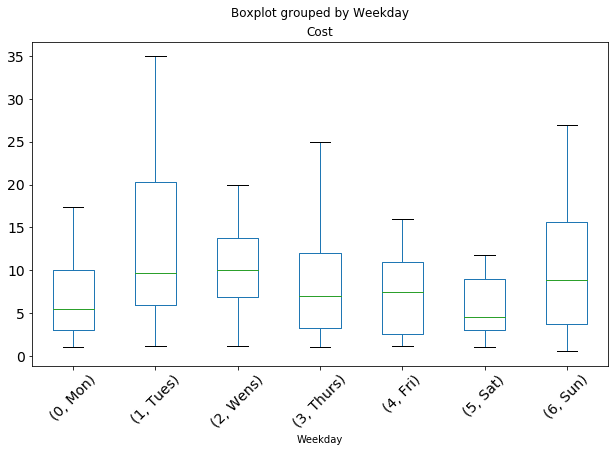

In [43]:
weekdays = [(0,'Mon'), (1,'Tues'), (2,'Wens'), (3,'Thurs'), (4,'Fri'), (5,'Sat'), (6,'Sun')]
def set_weekday(s):
    s['Weekday'] = weekdays[s['Date'].dayofweek]
    return s

spending_df['Weekday'] = 0
spending_df = spending_df.apply(set_weekday, axis=1)
spending_df.boxplot(column='Cost', by='Weekday', fontsize=14, grid=False, rot=45, figsize=(10,6), showfliers=False)

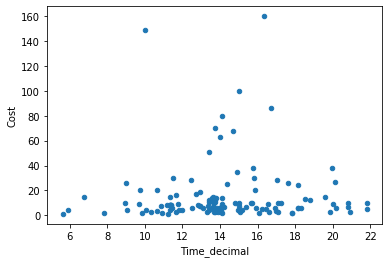

In [59]:
import re
def pull_decimal_timestamp(desc):
    possible_timestamp = desc[-7:]
    if re.search('\d\d\:\d\d', possible_timestamp) == None:
        return None
    hours = int(possible_timestamp[:2])
    mins = int(possible_timestamp[3:5])
    
    hours_decimal = hours + (mins / 60)
    return hours_decimal

def apply_pull_decimal_timestamp(ser):
    return ser.apply(pull_decimal_timestamp)


spending_df =  spending_df.assign(Time_decimal=lambda df: apply_pull_decimal_timestamp(df['Memo/Description']))
spending_df.plot.scatter(x='Time_decimal', y='Cost')
